<a href="https://colab.research.google.com/github/irutavias/healthcare/blob/main/DRG_exploration_by_MDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Major Diagnostic Categories (MDC) and MS-DRG Codes
1. **Pre-MDC**: MS-DRG 001 - 017
2. **Diseases and Disorders of the Nervous System**: MS-DRG 020 - 103
3. **Diseases and Disorders of the Eye**: MS-DRG 113 - 125
4. **Diseases and Disorders of the Ear, Nose, Mouth, and Throat**: MS-DRG 129 - 159
5. **Diseases and Disorders of the Respiratory System**: MS-DRG 163 - 208
6. **Diseases and Disorders of the Circulatory System**: MS-DRG 215 - 316
7. **Diseases and Disorders of the Digestive System**: MS-DRG 326 - 395
8. **Diseases and Disorders of the Hepatobiliary System and Pancreas**: MS-DRG 405 - 446
9. **Diseases and Disorders of the Musculoskeletal System and Connective Tissue**: MS-DRG 453 - 566
10. **Diseases and Disorders of the Skin, Subcutaneous Tissue, and Breast**: MS-DRG 573 - 607
11. **Diseases and Disorders of the Endocrine, Nutritional, and Metabolic System**: MS-DRG 614 - 645
12. **Diseases and Disorders of the Kidney and Urinary Tract**: MS-DRG 652 - 700
13. **Diseases and Disorders of the Male Reproductive System**: MS-DRG 707 - 730
14. **Diseases and Disorders of the Female Reproductive System**: MS-DRG 734 - 761
15. **Pregnancy, Childbirth, and Puerperium**: MS-DRG 765 - 782
16. **Newborn and Other Neonates (Perinatal Period)**: MS-DRG 789 - 795
17. **Diseases and Disorders of the Blood and Blood Forming Organs and Immunological Disorders**: MS-DRG 799 - 816
18. **Myeloproliferative DDs (Poorly Differentiated Neoplasms)**: MS-DRG 820 - 849
19. **Infectious and Parasitic DDs (Systemic or unspecified sites)**: MS-DRG 853 - 872
20. **Mental Diseases and Disorders**: MS-DRG 876 - 887
21. **Alcohol/Drug Use or Induced Mental Disorders**: MS-DRG 894 - 897
22. **Injuries, Poison and Toxic Effect of Drugs**: MS-DRG 901 - 923
23. **Burns**: MS-DRG 927 - 935
24. **Factors Influencing Health Status and Other Contacts with Health Services**: MS-DRG 939 - 951
25. **Multiple Significant Trauma**: MS-DRG 955 - 965
26. **Human Immunodeficiency Virus Infection**: MS-DRG 969 - 977
27. **MDC Category Missing**: MS-DRG 981 - 989; 998,999



In [ ]:
import pandas as pd

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_GEO.CSV', encoding='latin1')

prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_PRVSVC.CSV', encoding = 'latin1')

geo_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_GEO.CSV', encoding='latin1')

prov_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_PRVSVC.CSV', encoding = 'latin1')

geo_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_GEO.CSV', encoding = 'latin1')

prov_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_PRVSVC.CSV', encoding = 'latin1')

# Combine data for all years for both datasets
all_geo_data = pd.concat([geo_data_21.assign(year=2021), geo_data_20.assign(year=2020), geo_data_19.assign(year=2019)])
all_prov_data = pd.concat([prov_data_21.assign(year=2021), prov_data_20.assign(year=2020), prov_data_19.assign(year=2019)])

In [ ]:
all_prov_data.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,year
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.400000,36794.266667,33141.400000,2021
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.125000,26893.937500,22705.687500,2021
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.900000,31374.650000,27815.600000,2021
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.666670,12354.777778,8848.666667,2021
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.953488,8284.186047,6182.697674,2021


In [ ]:
all_geo_data.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,year
0,National,NaN,National,1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,1820,1.310561e+06,324827.19670,280854.31923,2021
1,National,NaN,National,2,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,62,6.365657e+05,160356.75806,134189.51613,2021
2,National,NaN,National,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,12404,8.496145e+05,200188.35585,174131.08070,2021
3,National,NaN,National,4,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,14906,5.485933e+05,123708.36086,108415.78224,2021
4,National,NaN,National,5,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,1179,7.312720e+05,144584.70483,114593.99576,2021


In [ ]:
# Define MDC to DRG mapping
mdc_to_drg = {
    0: range(1, 18), 1: range(20, 104), 2: range(113, 126), 3: range(129, 160),
    4: range(163, 209), 5: range(215, 317), 6: range(326, 396), 7: range(405, 447),
    8: range(453, 567), 9: range(573, 608), 10: range(614, 646), 11: range(652, 701),
    12: range(707, 731), 13: range(734, 762), 14: range(765, 783), 15: range(789, 796),
    16: range(799, 817), 17: range(820, 850), 18: range(853, 873), 19: range(876, 888),
    20: range(894, 898), 21: range(901, 924), 22: range(927, 936), 23: range(939, 952),
    24: range(955, 966), 25: range(969, 978), 26: range(981, 990), 27: [998, 999]
}

# Reverse mapping of DRG to MDC
drg_to_mdc = {}
for mdc, drg_range in mdc_to_drg.items():
    for drg in drg_range:
        drg_to_mdc[drg] = mdc

# Function to map DRG to MDC
def map_drg_to_mdc(drg):
    return drg_to_mdc.get(int(drg), 'Unknown')


In [ ]:
# Apply the mapping to both datasets
all_geo_data['MDC'] = all_geo_data['DRG_Cd'].apply(map_drg_to_mdc)
all_prov_data['MDC'] = all_prov_data['DRG_Cd'].apply(map_drg_to_mdc)

# Aggregate data by MDC
geo_mdc_summary = all_geo_data.groupby(['year', 'MDC']).agg({
    'Tot_Dschrgs': 'sum',
    'Avg_Tot_Pymt_Amt': 'sum',
    'Avg_Mdcr_Pymt_Amt': 'sum'
}).reset_index()

prov_mdc_summary = all_prov_data.groupby(['year', 'MDC']).agg({
    'Tot_Dschrgs': 'sum',
    'Avg_Tot_Pymt_Amt': 'sum',
    'Avg_Mdcr_Pymt_Amt': 'sum'
}).reset_index()

# Mapping of MDC descriptions
mdc_descriptions = {
    0: 'Pre-MDC', 1: 'Diseases of the Nervous System', 2: 'Diseases of the Eye',
    3: 'Diseases of the Ear, Nose, Mouth, and Throat', 4: 'Diseases of the Respiratory System',
    5: 'Diseases of the Circulatory System', 6: 'Diseases of the Digestive System',
    7: 'Diseases of the Hepatobiliary System and Pancreas', 8: 'Diseases of the Musculoskeletal System and Connective Tissue',
    9: 'Diseases of the Skin, Subcutaneous Tissue, and Breast', 10: 'Diseases of the Endocrine, Nutritional, and Metabolic System',
    11: 'Diseases of the Kidney and Urinary Tract', 12: 'Diseases of the Male Reproductive System',
    13: 'Diseases of the Female Reproductive System', 14: 'Pregnancy, Childbirth, and Puerperium',
    15: 'Newborn and Other Neonates (Perinatal Period)', 16: 'Diseases of the Blood and Blood Forming Organs and Immunological Disorders',
    17: 'Myeloproliferative DDs (Poorly Differentiated Neoplasms)', 18: 'Infectious and Parasitic DDs (Systemic or unspecified sites)',
    19: 'Mental Diseases and Disorders', 20: 'Alcohol/Drug Use or Induced Mental Disorders',
    21: 'Injuries, Poison and Toxic Effect of Drugs', 22: 'Burns', 23: 'Factors Influencing Health Status and Other Contacts with Health Services',
    24: 'Multiple Significant Trauma', 25: 'Human Immunodeficiency Virus Infection', 26: 'MDC Category Missing'
}

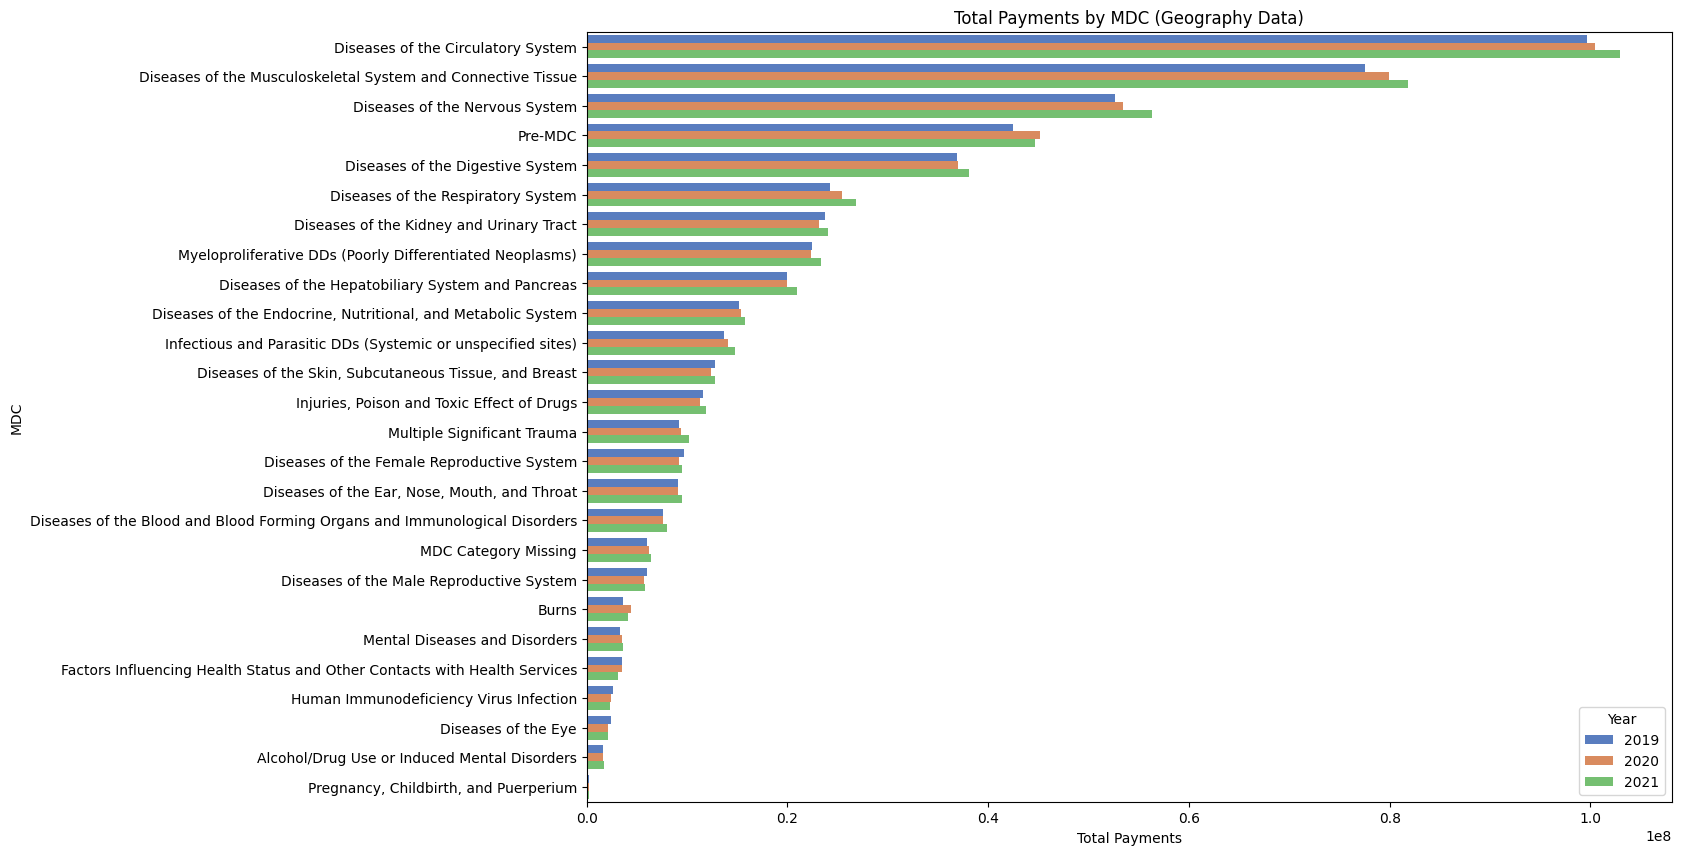

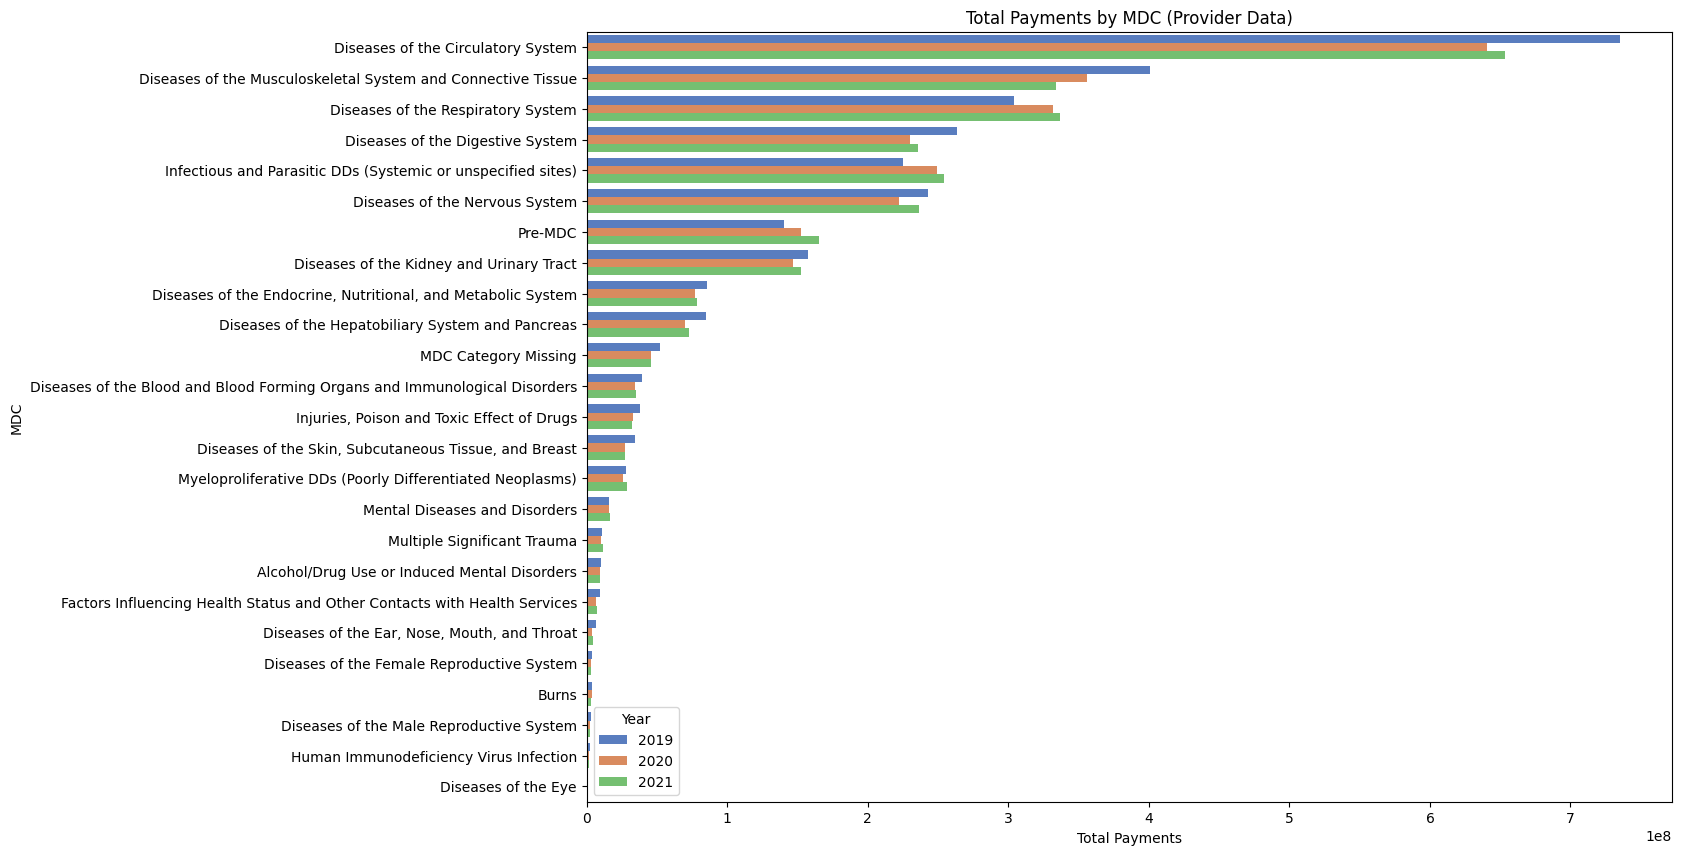

In [ ]:
# Apply descriptions to the summary data
geo_mdc_summary['MDC_Description'] = geo_mdc_summary['MDC'].map(mdc_descriptions)
prov_mdc_summary['MDC_Description'] = prov_mdc_summary['MDC'].map(mdc_descriptions)

# Sort the data by total payments from highest to lowest for better clarity in visualization
geo_mdc_summary_sorted = geo_mdc_summary.sort_values(by='Avg_Tot_Pymt_Amt', ascending=False)
prov_mdc_summary_sorted = prov_mdc_summary.sort_values(by='Avg_Tot_Pymt_Amt', ascending=False)

# Visualize the data with descriptions
plt.figure(figsize=(14, 10))
sns.barplot(x='Avg_Tot_Pymt_Amt', y='MDC_Description', hue='year', data=geo_mdc_summary_sorted, palette='muted')
plt.title('Total Payments by MDC (Geography Data)')
plt.xlabel('Total Payments')
plt.ylabel('MDC')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(14, 10))
sns.barplot(x='Avg_Tot_Pymt_Amt', y='MDC_Description', hue='year', data=prov_mdc_summary_sorted, palette='muted')
plt.title('Total Payments by MDC (Provider Data)')
plt.xlabel('Total Payments')
plt.ylabel('MDC')
plt.legend(title='Year')
plt.show()

analyse discharge and costs per mdc,
visualize payment trends by mdc

<ipython-input-29-396671dfe0d0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=palette, ax=ax)
<ipython-input-29-396671dfe0d0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=palette, ax=ax)
<ipython-input-29-396671dfe0d0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=palette, ax=ax)
<ipython-input-29-396671dfe0d0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

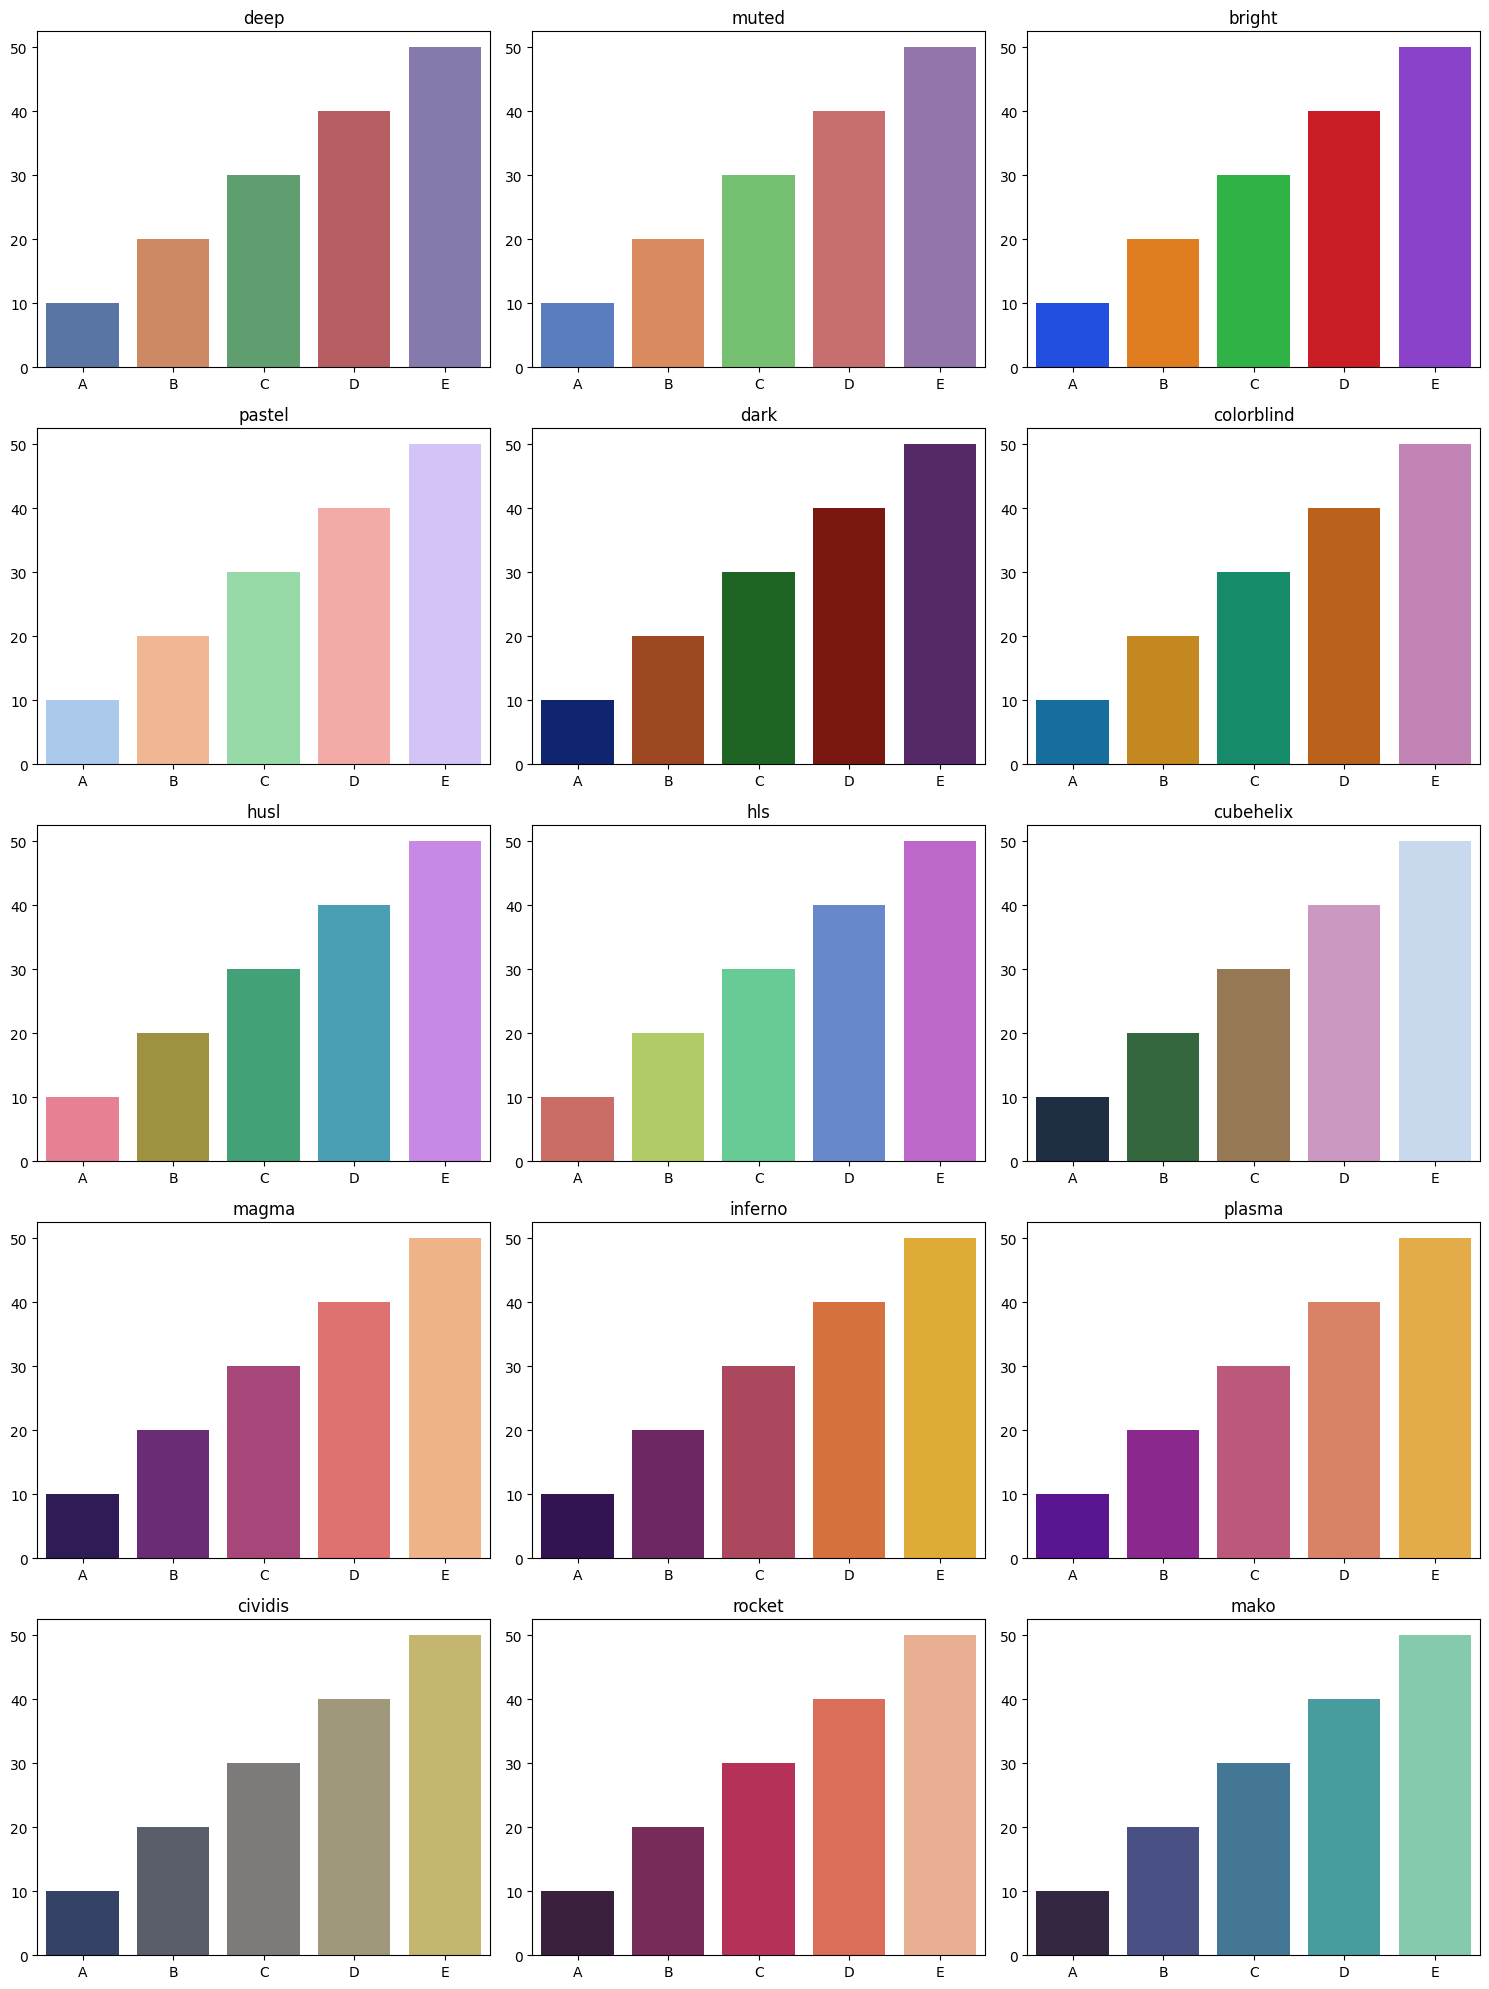

In [ ]:
#explore sns chart color schemes

import seaborn as sns
import matplotlib.pyplot as plt

# Example data
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 20, 30, 40, 50]

# List of seaborn color palettes
palettes = [
    'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind',
    'husl', 'hls', 'cubehelix', 'magma', 'inferno', 'plasma',
    'cividis', 'rocket', 'mako'
]

# Plot examples for each palette
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for ax, palette in zip(axes, palettes):
    sns.barplot(x=categories, y=values, palette=palette, ax=ax)
    ax.set_title(palette)

plt.tight_layout()
plt.show()


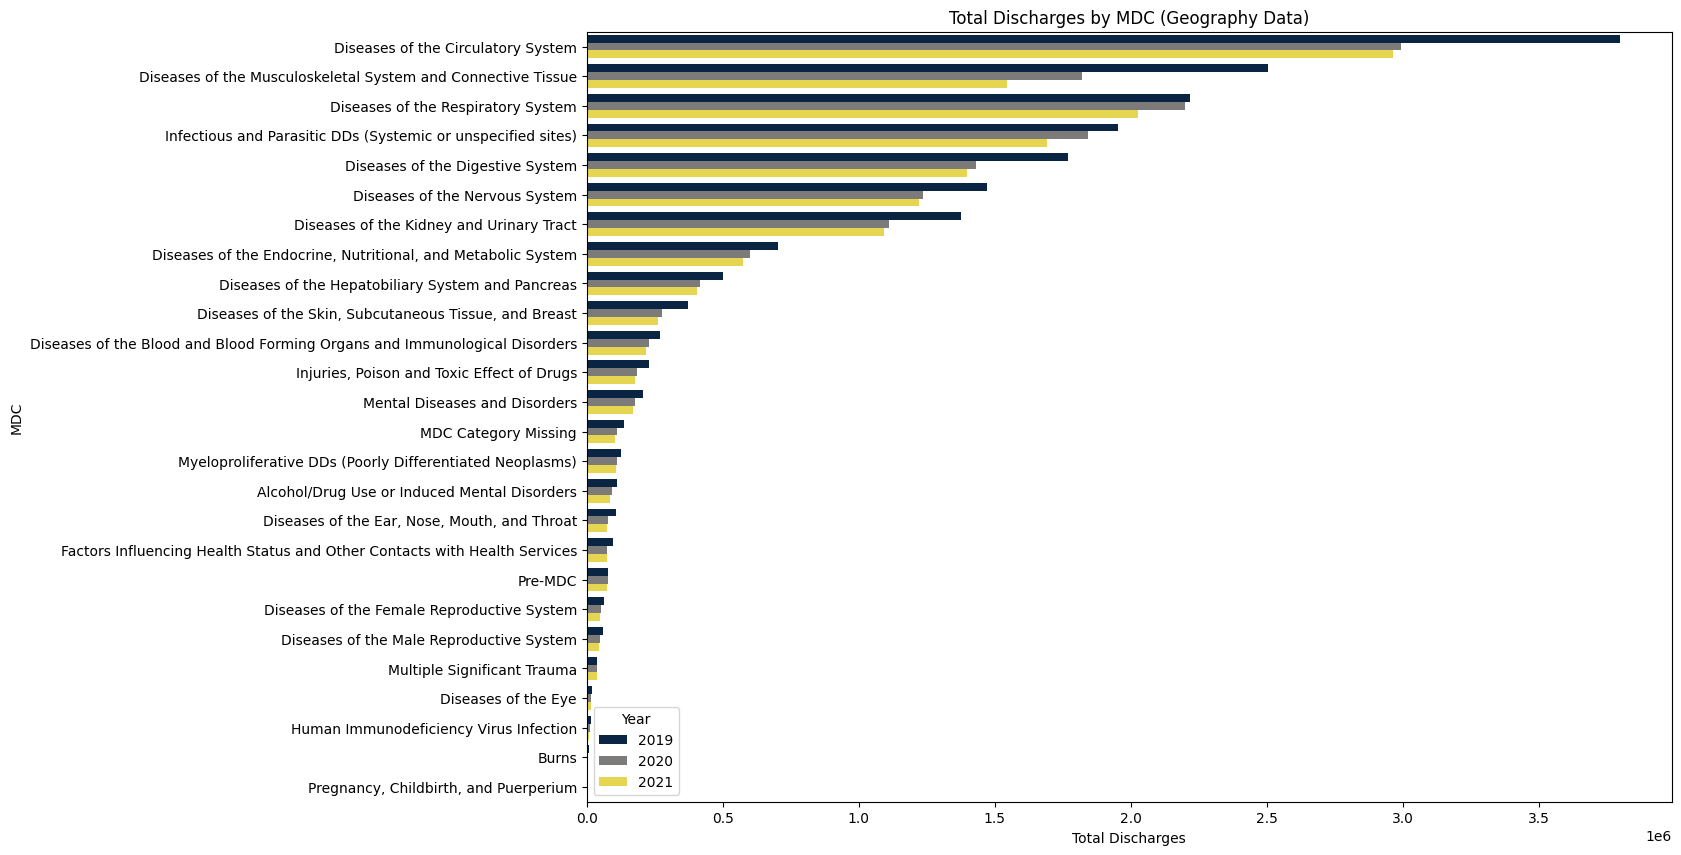

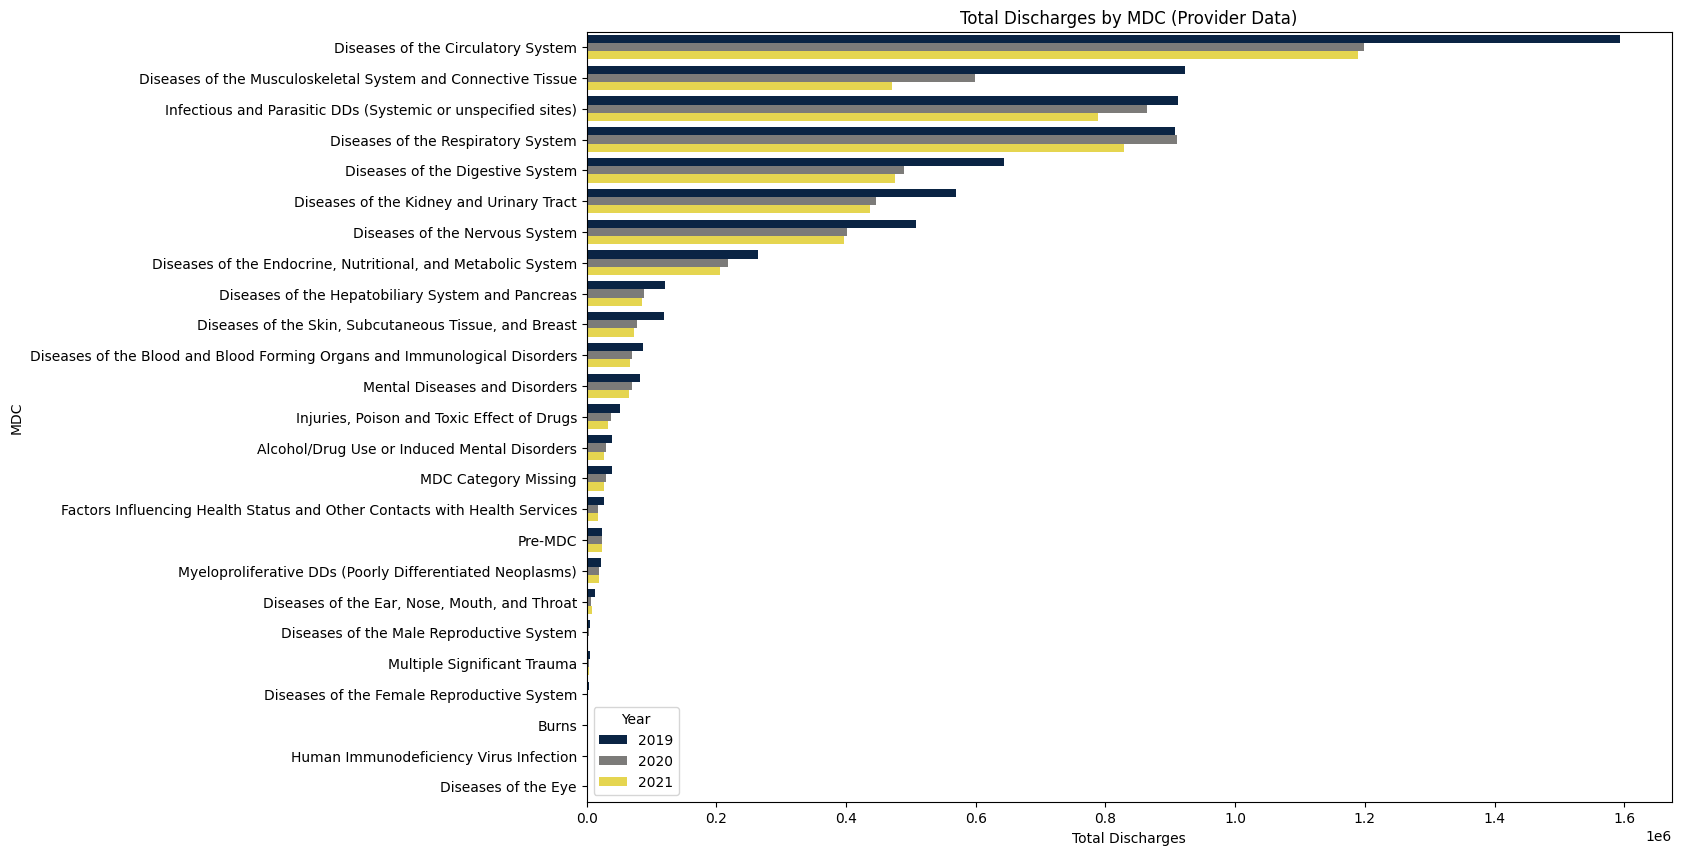

In [ ]:
# Aggregate data by MDC and year for discharges
geo_discharges_summary = all_geo_data.groupby(['year', 'MDC']).agg({
    'Tot_Dschrgs': 'sum'
}).reset_index()

prov_discharges_summary = all_prov_data.groupby(['year', 'MDC']).agg({
    'Tot_Dschrgs': 'sum'
}).reset_index()

# Apply descriptions to the discharge summary data
geo_discharges_summary['MDC_Description'] = geo_discharges_summary['MDC'].map(mdc_descriptions)
prov_discharges_summary['MDC_Description'] = prov_discharges_summary['MDC'].map(mdc_descriptions)

# Sort the data by total discharges from highest to lowest for better clarity in visualization
geo_discharges_summary_sorted = geo_discharges_summary.sort_values(by='Tot_Dschrgs', ascending=False)
prov_discharges_summary_sorted = prov_discharges_summary.sort_values(by='Tot_Dschrgs', ascending=False)

# Visualize the data with descriptions, sorted by total discharges
plt.figure(figsize=(14, 10))
sns.barplot(x='Tot_Dschrgs', y='MDC_Description', hue='year', data=geo_discharges_summary_sorted, palette='cividis') #coolwarm alt
plt.title('Total Discharges by MDC (Geography Data)')
plt.xlabel('Total Discharges')
plt.ylabel('MDC')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(14, 10))
sns.barplot(x='Tot_Dschrgs', y='MDC_Description', hue='year', data=prov_discharges_summary_sorted, palette='cividis')
plt.title('Total Discharges by MDC (Provider Data)')
plt.xlabel('Total Discharges')
plt.ylabel('MDC')
plt.legend(title='Year')
plt.show()
